In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
#컬럼 한꺼번에보기
from IPython.display import display
pd.options.display.max_columns = None
import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

pandas version:  1.1.3


In [2]:
# data 불러오기
df = pd.read_csv('Demo_최종_모델검증.csv', encoding='CP949')
df.head()

,ORDERID,SOLDDATE,CUSTID,PRODID,PRODNAME,WEEKDAY,SITEBUSNAME,REGION,D_DAY_2_TEM,D_DAY_2_HUM,D_DAY_2_WIND,D_DAY_2_TEM_RAINAMOUNT,D_DAY_2_RAINHOUR,ORDER_QUANT,SOLD_QUANT
0,AE21030434,2021-03-07,2007400,SSA013035307,AE,목,삼표,풍납,6.6,58.5,2.2,0.0,0.0,532,1000
1,HR1021030423,2021-03-07,2001500,PEMA363048300,PEMA-HR1000,목,제일,홍성,5.5,65.0,0.9,0.0,0.0,5184,6000
2,HR1021030426,2021-03-07,2001600,PEMA093001100,PEMA-HR1000,목,동해,동해,8.1,62.1,2.1,0.0,0.0,10032,8000
3,HR1021030427,2021-03-07,2001700,PEMA093001100,PEMA-HR1000,목,동해,동해,8.1,62.1,2.1,0.0,0.0,1344,2000
4,HR1521030432,2021-03-07,2002800,PEMA053046500,PEMA-HR1500,목,신일,송파,6.6,58.5,2.2,0.0,0.0,6260,5000


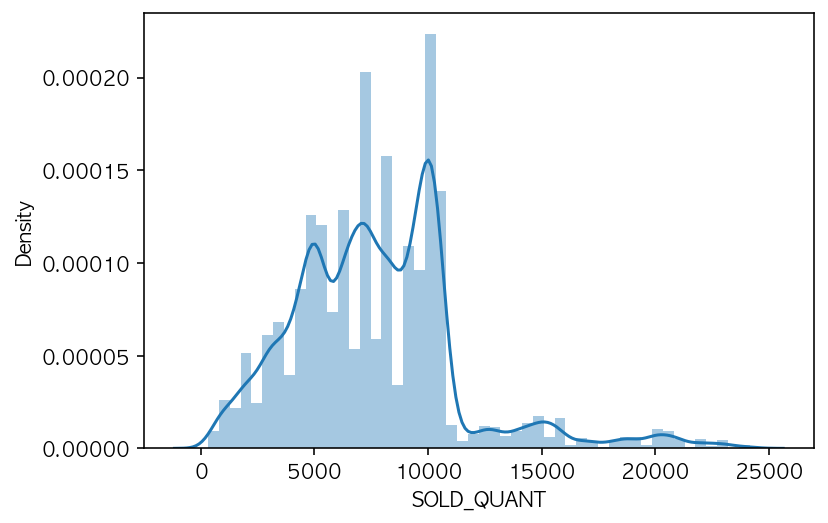

In [3]:
# 종속 변수 확인(편향 확인)

df1 = df['SOLD_QUANT']

ax = sns.distplot(df1)

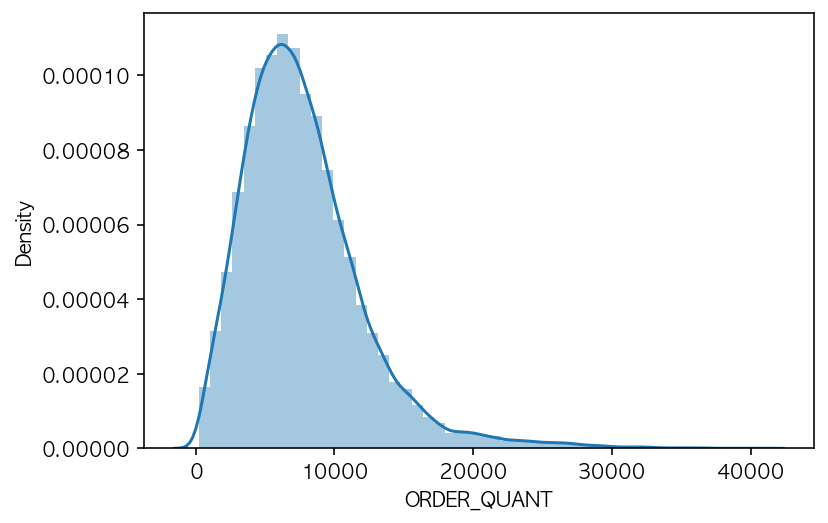

In [4]:
# 독립변수(ORDER_QUANT)/(편향 확인)

df1 = df['ORDER_QUANT']

ax = sns.distplot(df1)

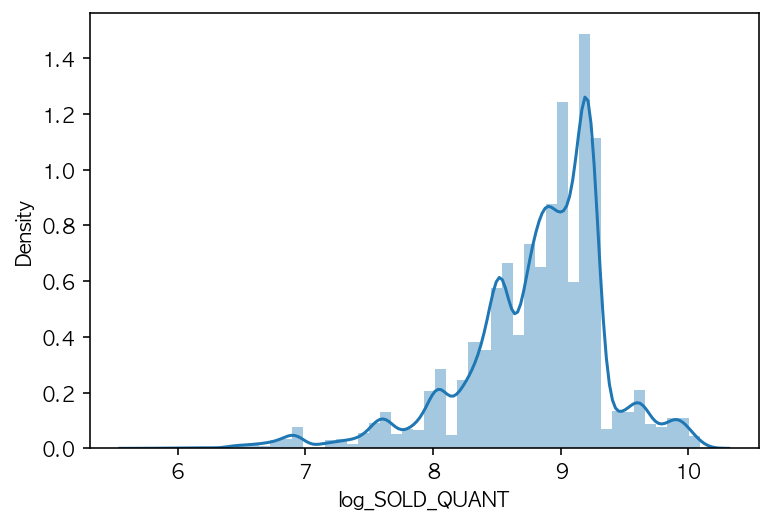

In [5]:
# 종속변수 로그화(편향완화 확인)

df['log_SOLD_QUANT'] = np.log1p(df['SOLD_QUANT'])

df1 = df['log_SOLD_QUANT']
ax = sns.distplot(df1)

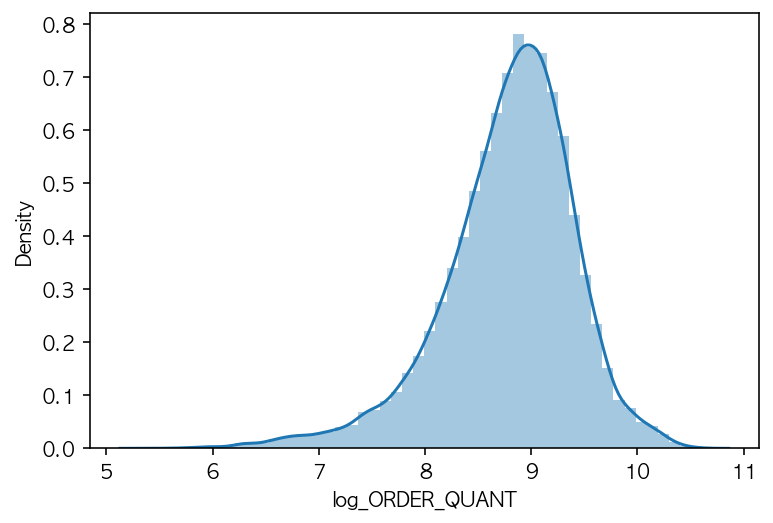

In [6]:
# 독립변수(ORDER_QUANT) 로그화(편향완화 확인)

df['log_ORDER_QUANT'] = np.log1p(df['ORDER_QUANT'])

df1 = df['log_ORDER_QUANT']
ax = sns.distplot(df1)

In [7]:
# null 값 전처리

# Drop 하지 않는 숫자형 Null 칼럼들은 평균값으로 대체
df.fillna(df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입 추출 -> 문자형은 널값 처리가 안되있음
null_column_count = df.isnull().sum()[df.isnull().sum()>0]
print('Null feature type:\n',df.dtypes[null_column_count.index])


Null feature type:
 Series([], dtype: object)


In [8]:
# 월별 기온 평균

df = df.astype({'SOLDDATE': 'str'})

q1_avg = df[df['SOLDDATE'].str.contains('-01-')]
q2_avg = df[df['SOLDDATE'].str.contains('-02-')]
q3_avg = df[df['SOLDDATE'].str.contains('-03-')]
q4_avg = df[df['SOLDDATE'].str.contains('-04-')]
q5_avg = df[df['SOLDDATE'].str.contains('-05-')]
q6_avg = df[df['SOLDDATE'].str.contains('-06-')]
q7_avg = df[df['SOLDDATE'].str.contains('-07-')]
q8_avg = df[df['SOLDDATE'].str.contains('-08-')]
q9_avg = df[df['SOLDDATE'].str.contains('-09-')]
q10_avg = df[df['SOLDDATE'].str.contains('-10-')]
q11_avg = df[df['SOLDDATE'].str.contains('-11-')]
q12_avg = df[df['SOLDDATE'].str.contains('-12-')]

q1m=q1_avg.D_DAY_2_TEM.mean()
q2m=q2_avg.D_DAY_2_TEM.mean()
q3m=q3_avg.D_DAY_2_TEM.mean()
q4m=q4_avg.D_DAY_2_TEM.mean()
q5m=q5_avg.D_DAY_2_TEM.mean()
q6m=q6_avg.D_DAY_2_TEM.mean()
q7m=q7_avg.D_DAY_2_TEM.mean()
q8m=q8_avg.D_DAY_2_TEM.mean()
q9m=q9_avg.D_DAY_2_TEM.mean()
q10m=q10_avg.D_DAY_2_TEM.mean()
q11m=q11_avg.D_DAY_2_TEM.mean()
q12m=q12_avg.D_DAY_2_TEM.mean()

print('3년치 1월 평균 온도:',np.round(q1m,3))
print('3년치 2월 평균 온도:',np.round(q2m,3))
print('3년치 3월 평균 온도:',np.round(q3m,3))
print('3년치 4월 평균 온도:',np.round(q4m,3))
print('3년치 5월 평균 온도:',np.round(q5m,3))
print('3년치 6월 평균 온도:',np.round(q6m,3))
print('3년치 7월 평균 온도:',np.round(q7m,3))
print('3년치 8월 평균 온도:',np.round(q8m,3))
print('3년치 9월 평균 온도:',np.round(q9m,3))
print('3년치 10월 평균 온도:',np.round(q10m,3))
print('3년치 11월 평균 온도:',np.round(q11m,3))
print('3년치 12월 평균 온도:',np.round(q12m,3))


3년치 1월 평균 온도: 0.952
3년치 2월 평균 온도: 3.423
3년치 3월 평균 온도: 8.197
3년치 4월 평균 온도: 12.668
3년치 5월 평균 온도: 18.327
3년치 6월 평균 온도: 22.522
3년치 7월 평균 온도: 24.52
3년치 8월 평균 온도: 26.372
3년치 9월 평균 온도: 21.134
3년치 10월 평균 온도: 14.293
3년치 11월 평균 온도: 7.403
3년치 12월 평균 온도: 0.858


In [9]:
# 월별 평균온도 (18~21년)
df['SOLDDATE'] = pd.to_datetime(df['SOLDDATE'],format= '%Y-%m-%d')
def m_temp(x):
    if x.month in [1]: return 0.952
    elif x.month in [2]: return 3.423
    elif x.month in [3]: return 8.197
    elif x.month in [4]: return 12.668
    elif x.month in [5]: return 18.327
    elif x.month in [6]: return 22.522
    elif x.month in [7]: return 24.52
    elif x.month in [8]: return 26.372
    elif x.month in [9]: return 21.134
    elif x.month in [10]: return 14.293
    elif x.month in [11]: return 7.403
    elif x.month in [12]: return 0.858
    
    

df['m_temp'] = df.SOLDDATE.apply(m_temp)

In [10]:
# 월별 강수 평균

df = df.astype({'SOLDDATE': 'str'})

q1_avg = df[df['SOLDDATE'].str.contains('-01-')]
q2_avg = df[df['SOLDDATE'].str.contains('-02-')]
q3_avg = df[df['SOLDDATE'].str.contains('-03-')]
q4_avg = df[df['SOLDDATE'].str.contains('-04-')]
q5_avg = df[df['SOLDDATE'].str.contains('-05-')]
q6_avg = df[df['SOLDDATE'].str.contains('-06-')]
q7_avg = df[df['SOLDDATE'].str.contains('-07-')]
q8_avg = df[df['SOLDDATE'].str.contains('-08-')]
q9_avg = df[df['SOLDDATE'].str.contains('-09-')]
q10_avg = df[df['SOLDDATE'].str.contains('-10-')]
q11_avg = df[df['SOLDDATE'].str.contains('-11-')]
q12_avg = df[df['SOLDDATE'].str.contains('-12-')]

q1r=q1_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q2r=q2_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q3r=q3_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q4r=q4_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q5r=q5_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q6r=q6_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q7r=q7_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q8r=q8_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q9r=q9_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q10r=q10_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q11r=q11_avg.D_DAY_2_TEM_RAINAMOUNT.mean()
q12r=q12_avg.D_DAY_2_TEM_RAINAMOUNT.mean()

print('3년치 1월 평균 강수량:',np.round(q1r,3))
print('3년치 2월 평균 강수량:',np.round(q2r,3))
print('3년치 3월 평균 강수량:',np.round(q3r,3))
print('3년치 4월 평균 강수량:',np.round(q4r,3))
print('3년치 5월 평균 강수량:',np.round(q5r,3))
print('3년치 6월 평균 강수량:',np.round(q6r,3))
print('3년치 7월 평균 강수량:',np.round(q7r,3))
print('3년치 8월 평균 강수량:',np.round(q8r,3))
print('3년치 9월 평균 강수량:',np.round(q9r,3))
print('3년치 10월 평균 강수량:',np.round(q10r,3))
print('3년치 11월 평균 강수량:',np.round(q11r,3))
print('3년치 12월 평균 강수량:',np.round(q12r,3))


3년치 1월 평균 강수량: 1.375
3년치 2월 평균 강수량: 2.182
3년치 3월 평균 강수량: 1.292
3년치 4월 평균 강수량: 2.629
3년치 5월 평균 강수량: 3.597
3년치 6월 평균 강수량: 4.404
3년치 7월 평균 강수량: 10.681
3년치 8월 평균 강수량: 9.717
3년치 9월 평균 강수량: 6.087
3년치 10월 평균 강수량: 0.708
3년치 11월 평균 강수량: 1.412
3년치 12월 평균 강수량: 0.616


In [11]:
# 월별 평균강수량 (18~21년)
df['SOLDDATE'] = pd.to_datetime(df['SOLDDATE'],format= '%Y-%m-%d')
def m_rain(x):
    if x.month in [1]: return 1.375
    elif x.month in [2]: return 2.182
    elif x.month in [3]: return 1.292
    elif x.month in [4]: return 2.629
    elif x.month in [5]: return 3.597
    elif x.month in [6]: return 4.404
    elif x.month in [7]: return 10.681
    elif x.month in [8]: return 9.717
    elif x.month in [9]: return 6.087
    elif x.month in [10]: return 0.708
    elif x.month in [11]: return 1.412
    elif x.month in [12]: return 0.616

df['m_rain'] = df.SOLDDATE.apply(m_rain)

In [12]:
# 요일별 수주량 합계
df = df.astype({'SOLDDATE': 'str'})

print('월요일 수주량 합계',np.sum((df.SOLDDATE)[df.WEEKDAY=='월']),'T')
print('화요일 수주량 합계',np.sum((df.SOLDDATE)[df.WEEKDAY=='화']),'T')
print('수요일 수주량 합계',np.sum((df.SOLDDATE)[df.WEEKDAY=='수']),'T')
print('목요일 수주량 합계',np.sum((df.SOLDDATE)[df.WEEKDAY=='목']),'T')
print('금요일 수주량 합계',np.sum((df.SOLDDATE)[df.WEEKDAY=='금']),'T')
print('토요일 수주량 합계',np.sum((df.SOLDDATE)[df.WEEKDAY=='토']),'T')
print('일요일 수주량 합계',np.sum((df.SOLDDATE)[df.WEEKDAY=='일']),'T')


월요일 수주량 합계 2021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-02-252021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-042021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-182021-03-1

In [13]:
# 지역변수 -> 광역시,도 별 범주화
def dododo(x):
    if x in ['성수','서울','송파','동서울', '이서', '풍납', '남부', '강서', '남서울','신림']: return '서울'
    
    elif x in ['수원','화성', '안양', '의왕', '용인', '영동', '동탄', '오산', '안산', '성남','천안', '평택', '천안','이천','여주','광주', '이천',\
               '안성', '옥산','동두천', '포천', '동두천', '양주', '의정부', '포천','양평','남양주', '구리', '하남', '진접', '덕소', '진영',\
               '파주', '고양', '일산','부천','김포','광명','미사리','비봉']: return '경기도'
    
    elif x in ['사천', '진주', '가좌','광양시','하동', '광양','산청','의령군', '함안', '의령', '창녕', '대산', '칠서',\
               '김해시','김해','함양군','함양','합천','마산', '진해', '창원','밀양', '창녕','양산시','양산','진주','사천',\
               '통영', '고성', '남포항','화도']: return '경상남도'
    
    elif x in ['의성','단촌','구미','약목', '옥계', '군위', '성주', '칠곡','영덕','울진','안동', '예천', '영양',\
               '영천','경산','포항','장흥','경주','문경','경산','고령']: return '경상북도'
    
    elif x in ['순창군' ,'담양', '순창','고창','장성','해남','여수','영광군',\
               '영광','목포', '무안', '해남','순천', '구례','장흥','나주','회주','완도','노화도','경광주','화순']: return '전라남도'
    
    elif x in ['익산', '군산', '군산한전주', '익산','전주','장수','전주', '완주','부안',\
               '남원','오수','임실','장성','정읍']: return '전라북도'
    
    elif x in ['서산', '당진', '태안','천안', '공주', '아산','금산','부여',\
               '청양', '논산', '계룡','홍성','천북', '보령','세종','연기','예산']: return '충청남도'
    
    elif x in ['청주', '청원', '옥천', '진천','제천','단양','성주','영동','충주', '음성','보은']: return '충청북도'
    
    elif x in ['홍성','북춘천', '춘천','원주','양양', '강릉','동해', '삼척','원주','횡성','속초','고성', '양양',\
               '정선군', '평창','영월','철원','현림수로']: return '강원도'
    
    elif x in ['대전광역시','대전','장동']: return '대전'
    
    elif x in ['대구','하빈']: return '대구'
    
    elif x in ['인천','송도','서인천']: return '인천'
    
    elif x in ['부산','회동동','서부산','신평','정관']: return '부산'
    
    elif x in ['울산','온산','언양',]: return '울산'
    
    elif x in ['세종']: return '세종'
    
    
    
df['DO'] = df.REGION.apply(dododo)

In [14]:
# 지역변수 범주화후 Null값 확인
df['DO'].isnull().sum()

0

In [15]:
# 종속변수 병합용 분리
df1 = df[['SOLDDATE']]

In [16]:
# 사용 변수 뽑기
df = df[['SOLD_QUANT','ORDER_QUANT','m_rain','m_temp','log_ORDER_QUANT','log_SOLD_QUANT','PRODNAME','SITEBUSNAME','WEEKDAY','DO']]

In [17]:
# 원핫 인코딩

print('ohe 전 shape:',df.shape)
df_ohe = pd.get_dummies(df[['m_rain','m_temp','PRODNAME','WEEKDAY','log_ORDER_QUANT','log_SOLD_QUANT','DO']])
print('ohe 후 shape:',df_ohe.shape)

null_column_count = df_ohe.isnull().sum()[df_ohe.isnull().sum()>0]
print(df_ohe.dtypes[null_column_count.index])


ohe 전 shape: (24216, 10)
ohe 후 shape: (24216, 51)
Series([], dtype: object)


In [18]:
df_ohe1 = pd.concat([df_ohe,df1],axis=1)
df_ohe2 = df_ohe1.copy()


df_ohe1 = df_ohe1.astype({'SOLDDATE': 'str'})

In [19]:
df_ohe1.drop('SOLDDATE',axis=1,inplace=True)
df_ohe2.drop('SOLDDATE',axis=1,inplace=True)

In [20]:
# 리니어 모델 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


X_features = df[['ORDER_QUANT']]

y_target = df['SOLD_QUANT'] 


X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,\
                                                 test_size=0.2,random_state=71)



# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('-- 21년 이외데이터로 훈련시킨 후 21년이후 데이터 테스트 --','\n')
print('-- 사용변수 : ORDER_QUANT -- ','\n')
print('MSLE : {0:.3f} , RMSLE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

LinearRegression()

-- 21년 이외데이터로 훈련시킨 후 21년이후 데이터 테스트 -- 

-- 사용변수 : ORDER_QUANT --  

MSLE : 3719622.047 , RMSLE : 1928.632
Variance score : 0.722


In [21]:
# 로그화된 변수 리니어 모델 평가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


X_features = df[['log_ORDER_QUANT']]

y_target = df['log_SOLD_QUANT'] 


X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,\
                                                 test_size=0.2,random_state=71)



# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('-- 21년 이외데이터로 훈련시킨 후 21년이후 데이터 테스트 --','\n')
print('-- 사용변수 : log_ORDER_QUANT -- ','\n')
print('MSLE : {0:.3f} , RMSLE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

LinearRegression()

-- 21년 이외데이터로 훈련시킨 후 21년이후 데이터 테스트 -- 

-- 사용변수 : log_ORDER_QUANT --  

MSLE : 0.059 , RMSLE : 0.243
Variance score : 0.810


In [22]:
# 평가용 사용자 함수
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

def get_rmse(model):
    fit = model.fit(X_train,y_train)
    pred=model.predict(X_test)
    mse = mean_squared_error(y_test,pred)
    rmse = np.sqrt(mse)
    print('{0} RMSLE: {1}'.\
          format(model.__class__.__name__,np.round(rmse,3),))
    print('Variance score : {0:.3f}'.format(r2_score(y_test,pred)))
    return rmse

def get_rmses(models):
    rmses = []
    for model in models:
        rmse =get_rmse(model)
        rmses.append(rmse)
    return rmses
    

In [23]:
df_ohe

,m_rain,m_temp,log_ORDER_QUANT,log_SOLD_QUANT,PRODNAME_AE,PRODNAME_CSA4000,PRODNAME_CSA4000(PCA),PRODNAME_CSA5000,PRODNAME_PEMA-500FR,PRODNAME_PEMA-580FX,PRODNAME_PEMA-CR1000,PRODNAME_PEMA-CSA5000,PRODNAME_PEMA-HR1000,PRODNAME_PEMA-HR1000S,PRODNAME_PEMA-HR1500,PRODNAME_PEMA-PCM2000,PRODNAME_PEMA-PCM2000B,PRODNAME_PEMA-PCR3000E,PRODNAME_PEMA-PCR3000N,PRODNAME_PEMA-PR1000,PRODNAME_PEMA-PR2000,PRODNAME_PEMA-SN400,PRODNAME_PEMA-SP1000,PRODNAME_PEMA-SPR,PRODNAME_PEMA-SR2000,PRODNAME_PEMA-SR2000A,PRODNAME_PEMA-SR3000F,PRODNAME_PEMA-SR5000F,PRODNAME_PR1000,PRODNAME_SRE-110,PRODNAME_SRE-200,WEEKDAY_금,WEEKDAY_목,WEEKDAY_수,WEEKDAY_월,WEEKDAY_일,WEEKDAY_화,DO_강원도,DO_경기도,DO_경상남도,DO_경상북도,DO_대구,DO_대전,DO_부산,DO_서울,DO_울산,DO_인천,DO_전라남도,DO_전라북도,DO_충청남도,DO_충청북도
0,1.292,8.197,6.278521,6.908755,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1.292,8.197,8.553525,8.699681,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1.292,8.197,9.213635,8.987322,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.292,8.197,7.204149,7.601402,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.292,8.197,8.742095,8.517393,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24211,1.375,0.952,8.089482,8.202756,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
24212,1.375,0.952,9.355652,9.301186,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
24213,1.375,0.952,7.545918,7.286876,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
24214,1.375,0.952,7.428333,7.286876,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
df_ohe.columns

Index(['m_rain', 'm_temp', 'log_ORDER_QUANT', 'log_SOLD_QUANT', 'PRODNAME_AE',
       'PRODNAME_CSA4000', 'PRODNAME_CSA4000(PCA)', 'PRODNAME_CSA5000',
       'PRODNAME_PEMA-500FR', 'PRODNAME_PEMA-580FX', 'PRODNAME_PEMA-CR1000',
       'PRODNAME_PEMA-CSA5000', 'PRODNAME_PEMA-HR1000',
       'PRODNAME_PEMA-HR1000S', 'PRODNAME_PEMA-HR1500',
       'PRODNAME_PEMA-PCM2000', 'PRODNAME_PEMA-PCM2000B',
       'PRODNAME_PEMA-PCR3000E', 'PRODNAME_PEMA-PCR3000N',
       'PRODNAME_PEMA-PR1000', 'PRODNAME_PEMA-PR2000', 'PRODNAME_PEMA-SN400',
       'PRODNAME_PEMA-SP1000', 'PRODNAME_PEMA-SPR', 'PRODNAME_PEMA-SR2000',
       'PRODNAME_PEMA-SR2000A', 'PRODNAME_PEMA-SR3000F',
       'PRODNAME_PEMA-SR5000F', 'PRODNAME_PR1000', 'PRODNAME_SRE-110',
       'PRODNAME_SRE-200', 'WEEKDAY_금', 'WEEKDAY_목', 'WEEKDAY_수', 'WEEKDAY_월',
       'WEEKDAY_일', 'WEEKDAY_화', 'DO_강원도', 'DO_경기도', 'DO_경상남도', 'DO_경상북도',
       'DO_대구', 'DO_대전', 'DO_부산', 'DO_서울', 'DO_울산', 'DO_인천', 'DO_전라남도',
       'DO_전라북도', 'DO_충청남도', 'DO_충청

In [25]:
# 원-핫 인코딩이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할.
# 평가용 사용자 함수
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_features = df_ohe[['m_rain', 'm_temp', 'log_ORDER_QUANT', 'PRODNAME_AE',
       'PRODNAME_CSA4000', 'PRODNAME_CSA4000(PCA)', 'PRODNAME_CSA5000',
       'PRODNAME_PEMA-500FR', 'PRODNAME_PEMA-580FX', 'PRODNAME_PEMA-CR1000',
       'PRODNAME_PEMA-CSA5000', 'PRODNAME_PEMA-HR1000',
       'PRODNAME_PEMA-HR1000S', 'PRODNAME_PEMA-HR1500',
       'PRODNAME_PEMA-PCM2000', 'PRODNAME_PEMA-PCM2000B',
       'PRODNAME_PEMA-PCR3000E', 'PRODNAME_PEMA-PCR3000N',
       'PRODNAME_PEMA-PR1000', 'PRODNAME_PEMA-PR2000', 'PRODNAME_PEMA-SN400',
       'PRODNAME_PEMA-SP1000', 'PRODNAME_PEMA-SPR', 'PRODNAME_PEMA-SR2000',
       'PRODNAME_PEMA-SR2000A', 'PRODNAME_PEMA-SR3000F',
       'PRODNAME_PEMA-SR5000F', 'PRODNAME_PR1000', 'PRODNAME_SRE-110',
       'PRODNAME_SRE-200', 'WEEKDAY_금', 'WEEKDAY_목', 'WEEKDAY_수', 'WEEKDAY_월',
       'WEEKDAY_일', 'WEEKDAY_화', 'DO_강원도', 'DO_경기도', 'DO_경상남도', 'DO_경상북도',
       'DO_대구', 'DO_대전', 'DO_부산', 'DO_서울', 'DO_울산', 'DO_인천', 'DO_전라남도',
       'DO_전라북도', 'DO_충청남도', 'DO_충청북도']]

y_target = df_ohe['log_SOLD_QUANT']

X_train,X_test,y_train,y_test = train_test_split(X_features,y_target,\
                                                 test_size=0.2,random_state=71)
# 모델별로 평가 수행

lr_reg = LinearRegression()

rf_reg = RandomForestRegressor()

dt_reg = DecisionTreeRegressor()

ridge_reg = Ridge()

lasso_reg = Lasso()

xgb_reg = XGBRegressor()

lgbm_reg = LGBMRegressor()

models = [lr_reg,rf_reg,dt_reg,ridge_reg,lasso_reg,xgb_reg,lgbm_reg]


print('-- 21년 이외데이터로 훈련시킨 후 21년이후 데이터 테스트 --','\n')
print("-- 최종 사용변수 : 'm_rain','m_temp','PRODNAME','WEEKDAY','q_rain','log_ORDER_QUANT','log_SOLD_QUANT','DO','\n'")
get_rmses(models)

-- 21년 이외데이터로 훈련시킨 후 21년이후 데이터 테스트 -- 

-- 최종 사용변수 : 'm_rain','m_temp','PRODNAME','WEEKDAY','q_rain','log_ORDER_QUANT','log_SOLD_QUANT','DO','
'
LinearRegression RMSLE: 0.231
Variance score : 0.828
RandomForestRegressor RMSLE: 0.199
Variance score : 0.872
DecisionTreeRegressor RMSLE: 0.267
Variance score : 0.772
Ridge RMSLE: 0.231
Variance score : 0.828
Lasso RMSLE: 0.558
Variance score : -0.000
XGBRegressor RMSLE: 0.187
Variance score : 0.888
LGBMRegressor RMSLE: 0.191
Variance score : 0.883


[0.23134153246789896,
 0.19941753752941668,
 0.26668067622712965,
 0.23134908906207835,
 0.5579266759816406,
 0.1867557954732655,
 0.19118682149995228]

In [26]:
# 교차 검증
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    
    for model in models:
        # 분할하지 않고 전체 데이터로 cross_val_score()수행. 모델별 CV RMSLE값과 평균 RMSLE 출력
        rmse_list = np.sqrt(-cross_val_score(model,X_features,y_target,\
                                            scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSLE 값 리스트: {1}'.format(model.__class__.__name__, \
                                                np.round(rmse_list,3)))
        print('{0} CV 평균 RMSLE 값: {1}'.format(model.__class__.__name__,np.round(rmse_avg,3)))
        
    
# 위에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSLE 값 출력
models = [lr_reg,ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSLE 값 리스트: [0.231 0.232 0.235 0.235 0.233]
LinearRegression CV 평균 RMSLE 값: 0.233

Ridge CV RMSLE 값 리스트: [0.231 0.232 0.235 0.235 0.233]
Ridge CV 평균 RMSLE 값: 0.233

Lasso CV RMSLE 값 리스트: [0.57  0.565 0.558 0.542 0.564]
Lasso CV 평균 RMSLE 값: 0.56


In [27]:
# 하이퍼 파라미터 튜닝

from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
    grid_model =GridSearchCV(model,param_grid=params,
                            scoring='neg_mean_squared_error',cv=5)
    grid_model.fit(X_features,y_target)
    rmse = np.sqrt(-1*grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSLE 값:{1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                                            np.round(rmse,4),grid_model.best_params_))
    return grid_model.best_estimator_
ridge_params = {'alpha': [0.05,0.1,1,5,8,10,12,15,20]}
lasso_params = {'alpha': [0.001,0.005,0.008,0.05,0.03,0.1,0.5,1,5,10]}
print_best_params(ridge_reg,ridge_params)
print_best_params(lasso_reg,lasso_params)

Ridge 5 CV 시 최적 평균 RMSLE 값:0.2331, 최적 alpha:{'alpha': 1}


Ridge(alpha=1)

Lasso 5 CV 시 최적 평균 RMSLE 값:0.2355, 최적 alpha:{'alpha': 0.001}


Lasso(alpha=0.001)

In [28]:
# XGBRegressor 모델 교차 검증 및 하이퍼 파라미터 튜닝
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSLE 값:0.1847, 최적 alpha:{'n_estimators': 1000}


In [29]:
# lgbm 모델 교차 검증 및 하이퍼 파라미터 튜닝
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000, 2000, 5000]}
lgbm_reg = LGBMRegressor(n_estimators=5000, learning_rate=0.01, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

LGBMRegressor 5 CV 시 최적 평균 RMSLE 값:0.2071, 최적 alpha:{'n_estimators': 5000}


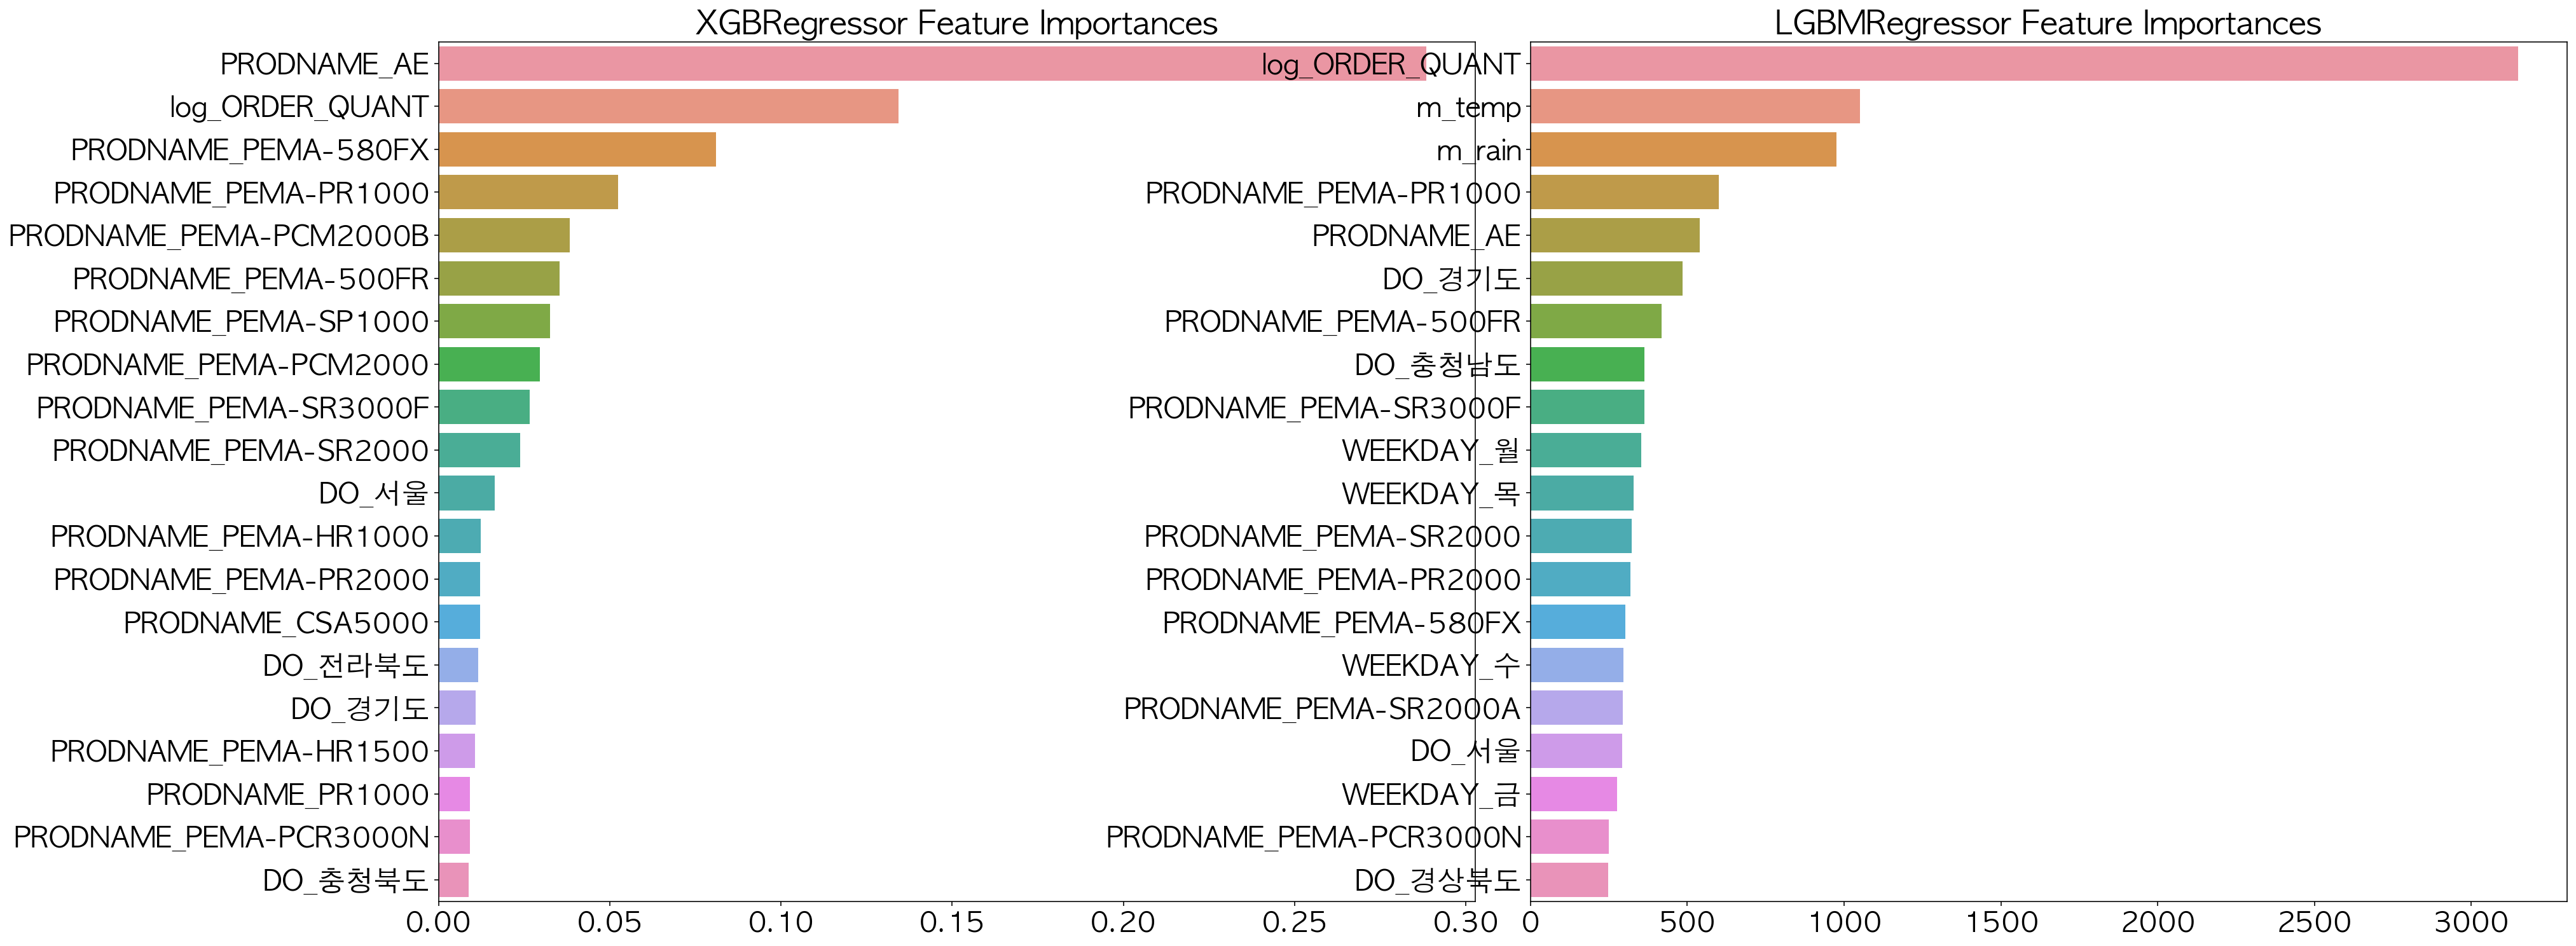

In [30]:
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
    # 2개 회귀 모델의 시각화를 위해 2개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])
  
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)

In [31]:
# XGBRegressor,LGBMRegressor,XGB_LGBM 혼합모델 교차 검증 및 하이퍼 파라미터 튜닝

def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSLE: {1}'.format(key, rmse))

xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

# 개별 모델의 학습
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)

# 개별 모델 예측
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
#최종 혼합 모델, 개별모델의 RMSLE 값 출력        
get_rmse_pred(preds)
print('Variance score : {0:.3f}'.format(r2_score(y_test,pred)))

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

LGBMRegressor(colsample_bytree=0.4, learning_rate=0.05, n_estimators=1000,
              num_leaves=4, reg_lambda=10, subsample=0.6)

최종 혼합 모델의 RMSLE: 0.18951956269865036
XGBM 모델의 RMSLE: 0.18386815671091286
LGBM 모델의 RMSLE: 0.20309897362334903
Variance score : 0.885


In [32]:
# 실제값 예측값 차이 체크
df1 = pd.DataFrame(y_test)
df2 = pd.DataFrame(xgb_pred)
df1.reset_index(inplace=True)
df =pd.concat([df1,df2],axis=1)
df = df.rename({'log_SOLD_QUANT':'True_values',0:'Prediced_values'},axis='columns')


In [33]:
# 로그화된 실제수주량 원복
df3 = np.expm1(df.True_values)
df4 = np.expm1(df.Prediced_values)

In [34]:
# 실제수주량과 모델에서 생성된 예측값과의 차이
df3 = pd.DataFrame(df3)
df4 = pd.DataFrame(df4)
df5 =pd.concat([df3,df4],axis=1)
df5

,True_values,Prediced_values
0,7140.0,8043.274414
1,10000.0,10129.255859
2,2850.0,3636.815430
3,7000.0,6230.809082
4,18136.0,16982.796875
...,...,...
4839,11828.0,14126.488281
4840,9300.0,9419.094727
4841,2850.0,3536.545410
4842,7000.0,3670.840820


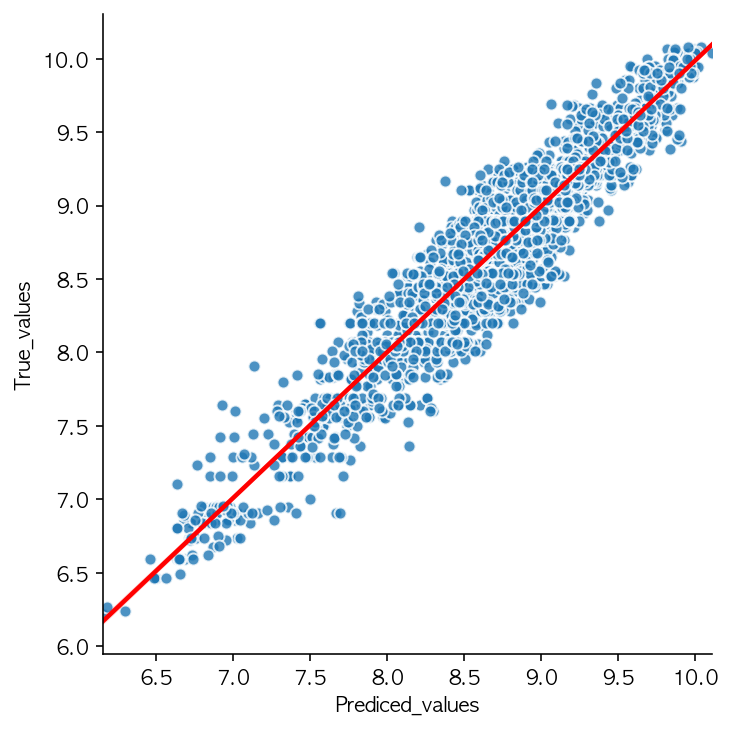

In [35]:
# 실제값과 예측값 분산  확인

ax = sns.lmplot(x='Prediced_values',y='True_values',data=df,line_kws={'color':"red"},order=1,scatter_kws={'edgecolor':"white"})